## Computer Problem Set 1.3

### Stochastic integration

In [36]:
#importation 
import numpy as np
import matplotlib.pyplot as plt
### Definition des constantes
M = 1000
T = 2

### 1. Approximation de $\displaystyle \int_{0}^{T} W_{s} \, \mathrm{d}W_{s}$

#### (a) - Simulation de  $M$ = 1000 copies de $ \frac{1}{2}W_{T}^{2} - I_n, \frac{1}{2}W_{T}^{2} - J_n, \frac{1}{2}W_{T}^{2} - K_n $

In [37]:
def interg(n = 12): # simulation en fonction des valeurs de n
    W = np.zeros((M,n+1))
    for j in range(M):
        for i in range(1,n+1):
            W[j][i] = W[j][i-1] + np.random.randn()*np.sqrt(T/n)
    res = np.zeros((3,M)) # res[0] : 0.5*W_T^2 - A_n
                          # res[1] = 0.5*W_T^2 - B_n
                          # res[2] = 0.5*W_T^2 - C_n
    for j in range(M):
        for i in range(n):
            res[0][j] += W[j][i]*(W[j][i+1]-W[j][i])
            res[1][j] += W[j][i+1]*(W[j][i+1]-W[j][i])
            res[2][j] += 0.5*(W[j][i+1] + W[j][i])*(W[j][i+1]-W[j][i])
        res[0][j] = 0.5*(W[j][n]**2)-res[0][j]
        res[1][j] = 0.5*(W[j][n]**2)-res[1][j]
        res[2][j] = 0.5*(W[j][n]**2)-res[2][j]

    return res
    


>>> La solutin de la questoin 1.a est donc 

In [38]:
resultat = interg(n =12 ) # contient M = 1000 examplaires de resultat[0] : 0.5*W_T^2 - I_n, resultat[1] = 0.5*W_T^2 - J_n et resultat[2] = 0.5*W_T^2 - K_n

#### (b) - Calculons les moyennes et interprétons les résultats

In [39]:
mean = np.mean(resultat, axis=1)

In [40]:
# les moyennes obtenu des simulaitions sont les suivantes:

print("la moyenne de  0.5*W_T^2 - I_n est:", mean[0],"\n")
print("la moyenne de  0.5*W_T^2 - J_n est:", mean[1],"\n")
print("la moyenne de  0.5*W_T^2 - K_n est:", mean[2])


la moyenne de  0.5*W_T^2 - I_n est: 0.9789394938752748 

la moyenne de  0.5*W_T^2 - J_n est: -0.9789394938752748 

la moyenne de  0.5*W_T^2 - K_n est: -8.137407407789437e-19


>> On observe que dans l'évaluation de $W_s$, si on se place à $t_{i-1}^{n}$ "point de gauche" on obtient une valeur différente de celle à $t_{i}^{n}$ ou au milieu.
>> donc en somme $W_s$ n'est pas Riemann ou Lebesgue intégrable 

#### (c) - variation de n de 10 à 20 

In [41]:
# tableau contenant les simulations pour n allant de 10 à 20
moyenne_I = []
variance_I = []
moyenne_J = []
variance_J = []
moyenne_K = []
variance_K = []
for n in range(10, 21):
    elt = interg(n)
    moyenne = np.mean(elt, axis= 1)
    variance = np.var(elt, axis = 1)
    moyenne_I.append(moyenne[0])
    moyenne_J.append(moyenne[1])
    moyenne_K.append(moyenne[2])
    variance_I.append(variance[0])
    variance_J.append(variance[1])
    variance_K.append(variance[2])

# Interval de confiance 

# pour I_n
means_I = np.stack(moyenne_I)
var_I = np.stack(variance_I)
sigma_I = np.sqrt(var_I)

# pour J_n
means_J = np.stack(moyenne_J)
var_J = np.stack(variance_J)
sigma_J = np.sqrt(var_J)

# pour K_n
means_K = np.stack(moyenne_K)
var_K = np.stack(variance_K)
sigma_K = np.sqrt(var_K)

>> La demi largeur de l'intervale de confiance à 95% est donnée par: $~~1.96 \frac{\sigma_M}{M}$        

In [42]:
indices = np.arange(10, 21)

def tracer(name, means, sigma):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fill_opts = {
    "label": "Confidence interval",
    "alpha": 0.3,
    "edgecolor": "b"
    }

    ax.plot(indices, means, label=r"Mean $\overline{"+name+"}$")
    ax.fill_between(
        indices,
        means-1.96*sigma/M**0.5,
        means+1.96*sigma/M**0.5,
        **fill_opts
    )
    ax.legend()
    ax.set_title("Estimator $%s$" % name)

    ax.set_xlabel("No. $n$ of subintervals.")
    #fig.suptitle(r"performance de l'estimateur de l'intégrale $\int_0^T W_s\,\mathrm{d}W_s$")

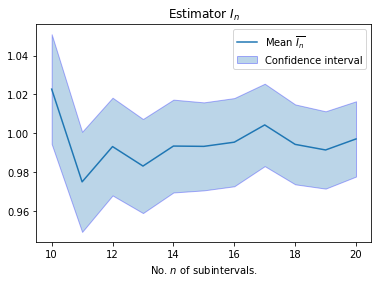

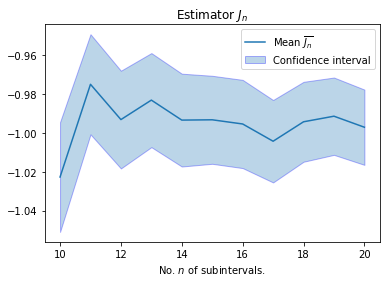

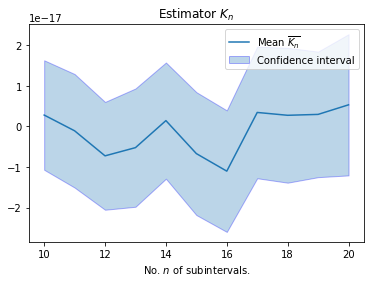

In [43]:
# le tracer

# I_n
tracer("I_n", means_I, sigma_I)
# J_n
tracer("J_n", means_J, sigma_J)
# K_n
tracer("K_n", means_K, sigma_K)

### 2. Répondre avec cette fois $A_n, B_n ~et~ C_n$

#### (a) - Simulation de  $M$ = 1000 copies de $ \frac{1}{2}W_{T}^{2} - A_n, \frac{1}{2}W_{T}^{2} - B_n, \frac{1}{2}W_{T}^{2} - C_n $

In [44]:
def interg(n = 12): # simulation en fonction des valeurs de n
    W = np.zeros((M,n+1))
    for j in range(M):
        for i in range(1,n+1):
            W[j][i] = W[j][i-1] + np.random.randn()*np.sqrt(T/n)
    res = np.zeros((3,M)) # res[0] : 0.5*W_T^2 - A_n
                          # res[1] = 0.5*W_T^2 - B_n
                          # res[2] = 0.5*W_T^2 - C_n
    for j in range(M):
        for i in range(n):
            res[0][j] += np.exp(i*T/n)*(W[j][i+1]-W[j][i])
            res[1][j] += np.exp((i+1)*T/n)*(W[j][i+1]-W[j][i])
            res[2][j] += np.exp((2*i+1)*T/n)*(W[j][i+1]-W[j][i])
        res[0][j] = 0.5*(W[j][n]**2)-res[0][j]
        res[1][j] = 0.5*(W[j][n]**2)-res[1][j]
        res[2][j] = 0.5*(W[j][n]**2)-res[2][j]

    return res

>>> La solutin de la questoin 2.a est donc 

In [45]:
resultat = interg(n =12 ) # contient M = 1000 examplaires de resultat[0] : 0.5*W_T^2 - A_n, resultat[1] = 0.5*W_T^2 - B_n et resultat[2] = 0.5*W_T^2 - C_n

#### (b) - Calculons les moyennes et interprétons les résultats

In [46]:
mean = np.mean(resultat, axis=1)

In [47]:
# les moyennes obtenu des simulaitions sont les suivantes:

print("la moyenne de  0.5*W_T^2 - A_n est:", mean[0],"\n")
print("la moyenne de  0.5*W_T^2 - B_n est:", mean[1],"\n")
print("la moyenne de  0.5*W_T^2 - C_n est:", mean[2])

la moyenne de  0.5*W_T^2 - A_n est: 1.004550706864132 

la moyenne de  0.5*W_T^2 - B_n est: 1.0038031405597896 

la moyenne de  0.5*W_T^2 - C_n est: 1.1906504763516768


>> On constate que l'intégrale de la fonction exponentielle ne subit pas d'énorme variations en fonction du représentant choisit $ à ~t_{i}^{n}  ~ou~ t_{i+1}^{n}  ou ~ \frac{1}{2}(t_{i}^{n} +t_{i+1}^{n}) $ 

#### (c) - variation de n de 10 à 20

In [48]:
# tableau contenant les simulations pour n allant de 10 à 20
moyenne_A = []
variance_A = []
moyenne_B = []
variance_B = []
moyenne_C = []
variance_C = []
for n in range(10, 21):
    elt = interg(n)
    moyenne = np.mean(elt, axis= 1)
    variance = np.var(elt, axis=1)
    moyenne_A.append(moyenne[0])
    variance_A.append(variance[0])
    moyenne_B.append(moyenne[1])
    variance_B.append(variance[1])
    moyenne_C.append(moyenne[2])
    variance_C.append(variance[2])

# Interval de confiance 

# pour A_n
means_A = np.stack(moyenne_A)
var_A = np.stack(variance_A)
sigma_A = np.sqrt(var_A)

# pour B_n
means_B = np.stack(moyenne_B)
var_B = np.stack(variance_B)
sigma_B = np.sqrt(var_B)

# pour C_n
means_C = np.stack(moyenne_C)
var_C = np.stack(variance_C)
sigma_C = np.sqrt(var_C)


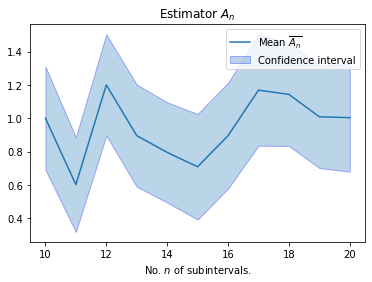

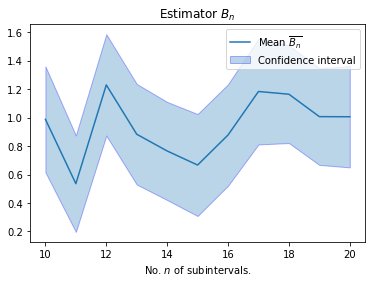

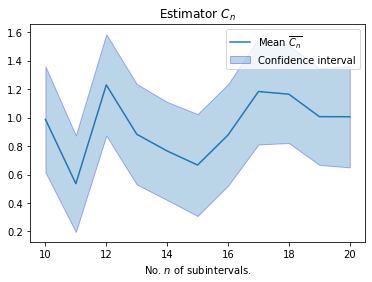

In [49]:
# le tracer

# I_n
tracer("A_n", means_A, sigma_A)
# J_n
tracer("B_n", means_B, sigma_B)
# K_n
tracer("C_n", means_B, sigma_B)

### 3.

#### (a) - Calculons $M = 1000$ valeurs de $A_n$ et calculons les moyennes pour $n$ allant de 10 à 20

In [50]:
def interg(n = 12): # simulation en fonction des valeurs de n
    W = np.zeros((M,n+1))
    for j in range(M):
        for i in range(1,n+1):
            W[j][i] = W[j][i-1] + np.random.randn()*np.sqrt(T/n)
    A_n = np.zeros(M) 
                          
    for j in range(M):
        for i in range(n):
            A_n[j] += np.sin(W[j][i])
        
        A_n[j] /= 2*n
        A_n[j] += np.sin(W[j][n])

    return A_n

In [52]:
# tableau contenant les simulations pour n allant de 10 à 20
moyenne = []
variance = []
for n in range(10, 201):
    elt = interg(n)
    moyenne.append(np.mean(elt))
    variance.append(np.var(elt))
moyenne = np.stack(moyenne)
variance = np.stack(variance)
sigma = np.sqrt(variance) 

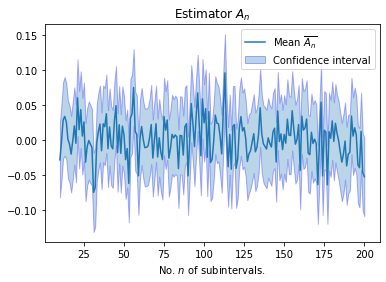

In [53]:
# A_n
indices = np.arange(10, 201)
tracer("A_n", moyenne, sigma)